In [60]:
#%pip install rouge_score absl-py
#%pip install matplotlib seaborn numpy

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   --------- ----------------------------- 71.7/294.9 kB 435.7 kB/s eta 0:00:01
   -------------- ----------------------- 112.6/294.9 kB 656.4 kB/s eta 0:00:01
   ---------------------------------- ----- 256.0/294.9 kB 1.0 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


# Importing Packages

In [66]:
from datasets import load_metric
import nltk
from nltk.translate.meteor_score import meteor_score
import numpy as np
import json

# Answer Extraction

In [75]:
alpaca_native = 'C:\\Users\\lucac\\OneDrive\\Desktop\\Università\\13_Thesis\\alpaca-lora-main\\metrics\\alpaca-native_pred.json'
drugd_alpaca = 'C:\\Users\\lucac\\OneDrive\\Desktop\\Università\\13_Thesis\\alpaca-lora-main\\metrics\\drugd-alpaca_pred.json'
test = 'C:\\Users\\lucac\\OneDrive\\Desktop\\Università\\13_Thesis\\alpaca-lora-main\\metrics\\test_data_s.json'


def extract_outputs(json_file_path):
    with open(json_file_path, 'r') as file:
        data = json.load(file)
    outputs = []
    for entry in data:
        if 'output' in entry:
            outputs.append(entry['output'])
    return outputs

# Metrics

In [180]:
# Initialize the metrics from the datasets library
exact_match_metric = load_metric('exact_match')
f1_metric = load_metric('f1')
bleu_metric = load_metric('bleu')
rouge_metric = load_metric('rouge')

# Prepare your model's predictions and the corresponding references
predictions_raw = extract_outputs(drugd_alpaca)

references = extract_outputs(test)

def null_handler(list):
    output = [i if i != '' else 'NaN' for i in list]
    return output

predictions = null_handler(predictions_raw)

c:\Users\lucac\anaconda3\envs\alpaca\Lib\site-packages\datasets\load.py:756: FutureWarning: The repository for exact_match contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/exact_match/exact_match.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(
c:\Users\lucac\anaconda3\envs\alpaca\Lib\site-packages\datasets\load.py:756: FutureWarning: The repository for f1 contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/f1/f1.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory

In [181]:
import nltk
from nltk.tokenize import word_tokenize
from datasets import load_metric

nltk.download('punkt')

# Function to tokenize data
def tokenize_data(data):
    return [word_tokenize(text) for text in data]

# Tokenize predictions and references for all metric calculations
tokenized_predictions = tokenize_data(predictions)
tokenized_references = [tokenize_data([ref]) for ref in references]  # Wrap each ref in another list for consistency

# Calculate Exact Match if needed
exact_matches = [exact_match_metric.compute(predictions=[p], references=[r]) for p, r in zip(predictions, references)]
average_em = np.mean([em['exact_match'] for em in exact_matches])

# Prepare data for BLEU
bleu_result = bleu_metric.compute(predictions=tokenized_predictions, references=tokenized_references)
print(f"BLEU Score: {bleu_result['bleu'] * 100:.2f}")

#Calculate ROUGE Scores
rouge_result = rouge_metric.compute(predictions=[pred for pred in tokenized_predictions], references=[[ref for ref in refs] for refs in tokenized_references], use_aggregator = True)
print("ROUGE Scores:", rouge_result)

# Calculate METEOR correctly using lists of words
meteor_scores = [meteor_score(ref, pred) for ref, pred in zip(tokenized_references, tokenized_predictions)]
average_meteor = np.mean(meteor_scores)

# Output results
print(f"Average Exact Match: {average_em:.2%}")
print(f"Average METEOR Score: {average_meteor:.4f}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lucac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


BLEU Score: 5.90
ROUGE Scores: {'rouge1': AggregateScore(low=Score(precision=0.45297328058947284, recall=0.28004643902974924, fmeasure=0.32246349243900607), mid=Score(precision=0.46014408769411774, recall=0.2855194098310815, fmeasure=0.32735841725439907), high=Score(precision=0.4677325172886625, recall=0.29078671207992707, fmeasure=0.33230392334177794)), 'rouge2': AggregateScore(low=Score(precision=0.17287800304747813, recall=0.1042102705358132, fmeasure=0.12108506344814203), mid=Score(precision=0.17906771681964612, recall=0.10843466804971753, fmeasure=0.1252829455494853), high=Score(precision=0.1849146122242277, recall=0.1120795068880698, fmeasure=0.12931669581085925)), 'rougeL': AggregateScore(low=Score(precision=0.3372291482008255, recall=0.20927033563855604, fmeasure=0.2403709727829804), mid=Score(precision=0.3437365118592094, recall=0.214057556514053, fmeasure=0.24476659609993223), high=Score(precision=0.3501562291447136, recall=0.21880376553878972, fmeasure=0.24874984689622698)),

# Plotting Results

Text(0, 0.5, 'Frequency')

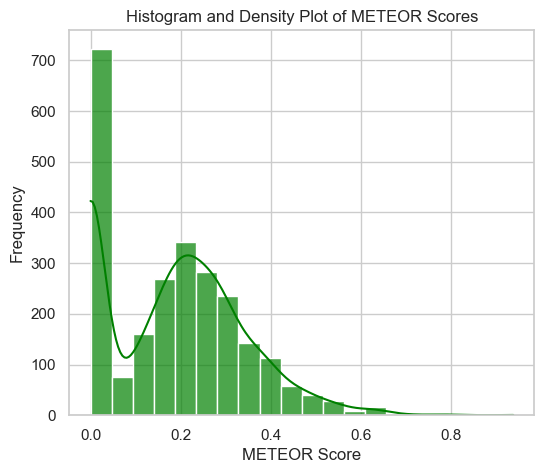

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming rouge_result is a dictionary containing lists of scores
rouge_scores = [np.mean([score.fmeasure for score in value]) for key, value in rouge_result.items()]

# Assuming meteor_scores are already in a list
meteor_scores = [score for score in meteor_scores]

# Histograms for each metric
plt.figure(figsize=(6, 5))

sns.histplot(meteor_scores, bins=20, color='green', kde=True, alpha=0.7)
plt.title('Histogram and Density Plot of METEOR Scores')
plt.xlabel('METEOR Score')
plt.ylabel('Frequency')


In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

class Score:
    """ A mock Score class to simulate the expected Score object structure. """
    def __init__(self, precision, recall, fmeasure):
        self.precision = precision
        self.recall = recall
        self.fmeasure = fmeasure

def extract_rouge_scores(rouge_scores, key='rouge1'):
    # Initialize lists to hold the scores
    score_data = {
        'precision': [],
        'recall': [],
        'fmeasure': []
    }
    
    # Check if the key exists in the dictionary and that the content is iterable
    if key in rouge_scores and isinstance(rouge_scores[key], list):
        # Loop through each score in the list for the specified key
        for score in rouge_scores[key]:
            score_data['precision'].append(score.precision)
            score_data['recall'].append(score.recall)
            score_data['fmeasure'].append(score.fmeasure)
    else:
        print(f"Key '{key}' not found in the provided dictionary, or the content is not a list.")
        return pd.DataFrame()  # Return an empty DataFrame if there's an issue
    
    # Convert the lists into a DataFrame
    return pd.DataFrame(score_data)

def plot_rouge_scores_histograms(df, bins=20):
    """
    Plots histograms for precision, recall, and f-measure from a DataFrame.

    Parameters:
        df (pd.DataFrame): DataFrame containing the ROUGE scores.
        bins (int): Number of bins to use in the histograms.
    """
    # Create a figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(5, 10), sharey=True)

    # Plot histograms
    sns.histplot(df['precision'], bins=bins, ax=axes[0], color='blue', kde=True)
    axes[0].set_title('Precision Distribution')
    axes[0].set_xlabel('Precision')

    sns.histplot(df['recall'], bins=bins, ax=axes[1], color='green', kde=True)
    axes[1].set_title('Recall Distribution')
    axes[1].set_xlabel('Recall')

    sns.histplot(df['fmeasure'], bins=bins, ax=axes[2], color='red', kde=True)
    axes[2].set_title('F-measure Distribution')
    axes[2].set_xlabel('F-measure')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [185]:
rouge_result_full = rouge_metric.compute(predictions=[pred for pred in tokenized_predictions], references=[[ref for ref in refs] for refs in tokenized_references], use_aggregator = False)

rouge1 = extract_rouge_scores(rouge_result_full, key='rouge1')
rouge2 = extract_rouge_scores(rouge_result_full, key='rouge2')
rougeL = extract_rouge_scores(rouge_result_full, key='rougeL')
rougeLsum = extract_rouge_scores(rouge_result_full, key='rougeLsum')

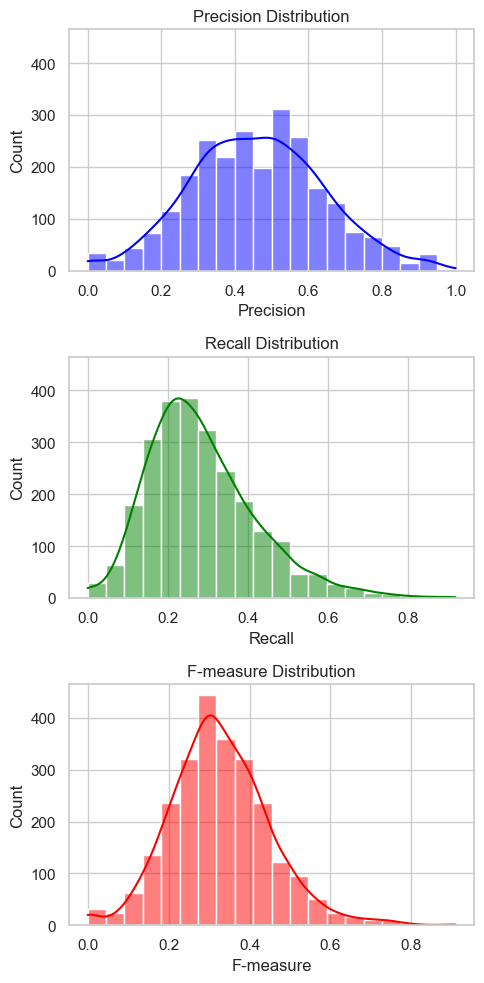

In [194]:
plot_rouge_scores_histograms(rouge1, bins=20)


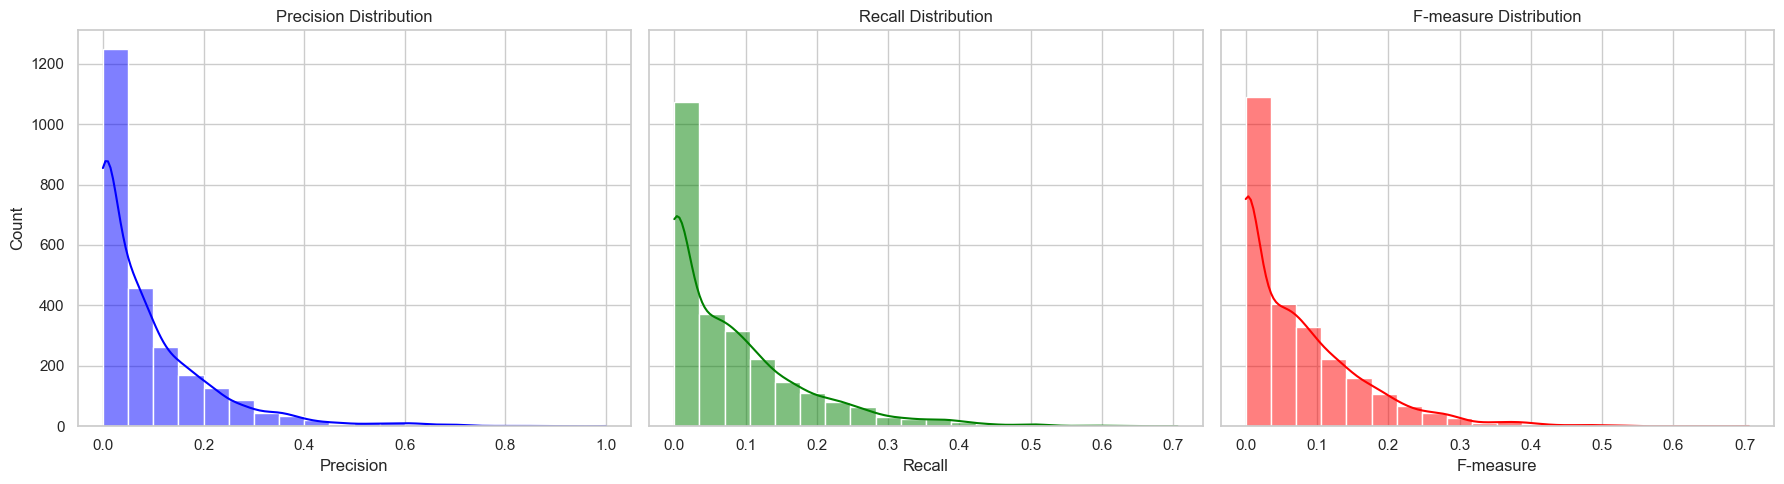

In [177]:
plot_rouge_scores_histograms(rouge2, bins=20)

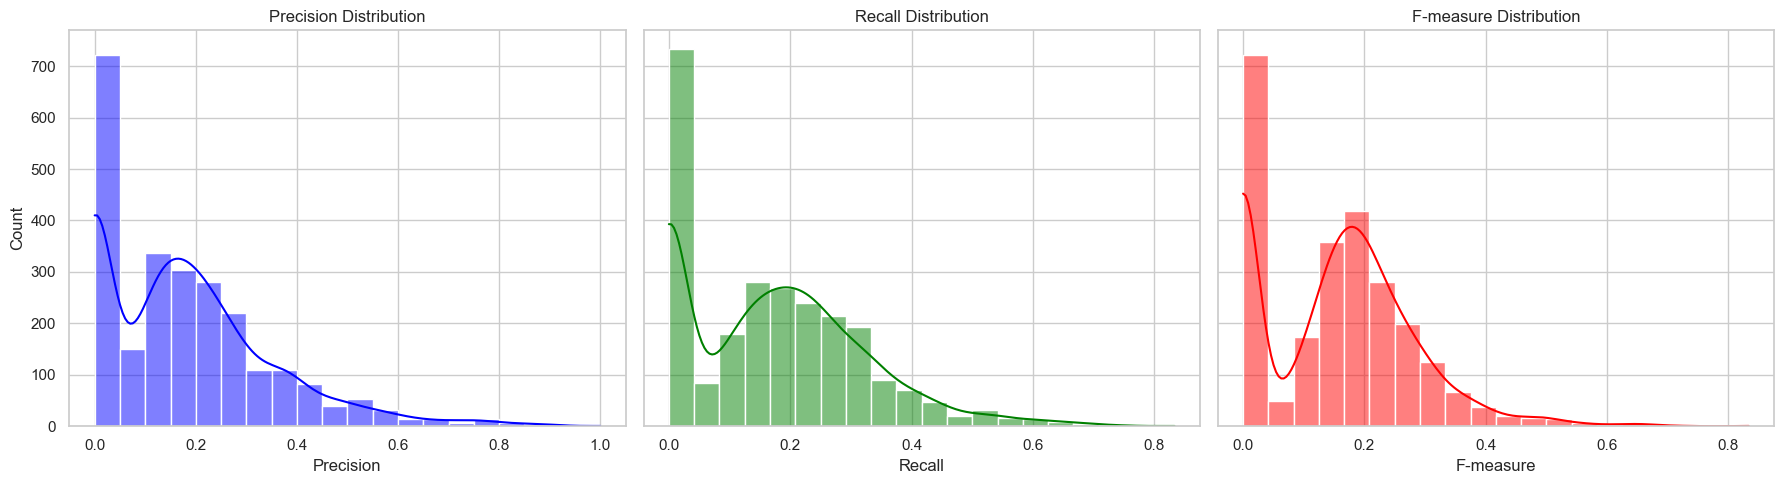

In [178]:
plot_rouge_scores_histograms(rougeL, bins=20)

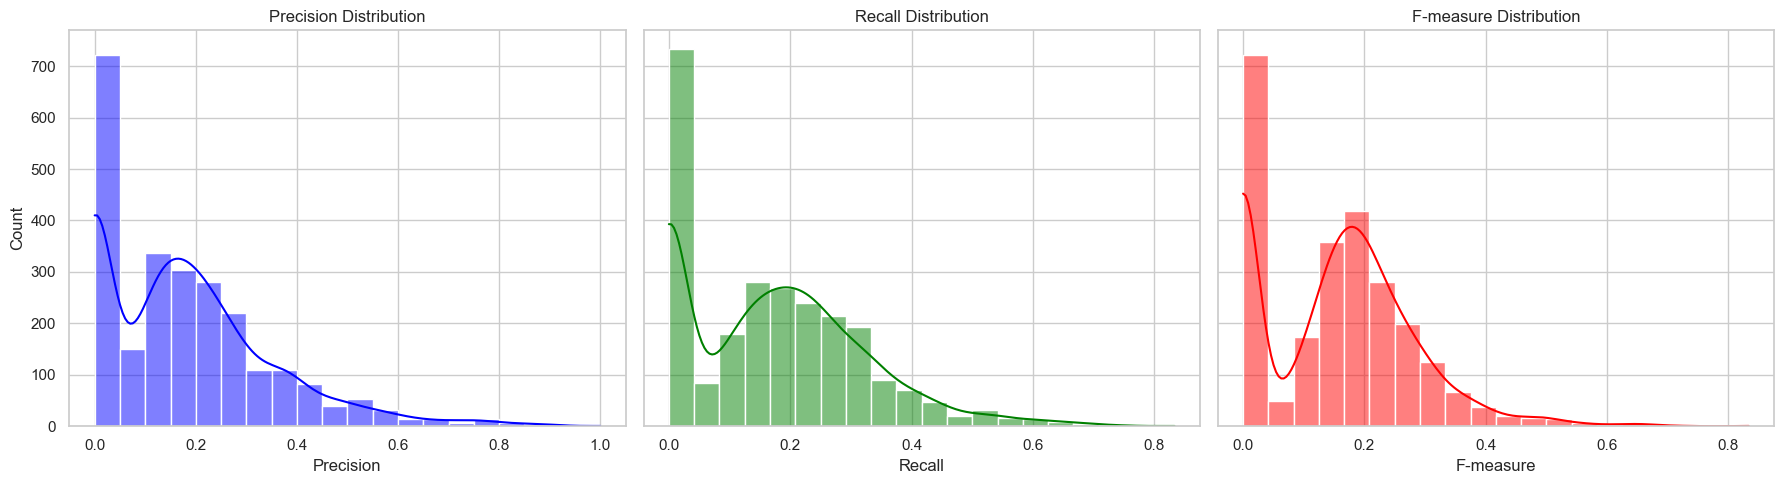

In [179]:
plot_rouge_scores_histograms(rougeLsum, bins=20)